In [1]:
# LOAD MODULES
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from kmodes_score.util import get_unique_rows
from collections import Counter, defaultdict
from sklearn import preprocessing

# Load raw data

In [2]:
df1 = pd.read_csv('evaluation_1.csv', sep=',')


C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,71,74,92,134,135,147,175,176,178,184,195,198,204,205,211,214,216,218,219,220,221,224,226,234,235,236,237,242,243,244,247,248,253,255,256,257,265,266,268,270,272,274,275,276,279,281,289,290) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Reduce the raw data dimensions, only keep certain numeric columns
### use the existing encoding columns

In [3]:
df1 = df1.select_dtypes(include=[np.number]).dropna(axis=0, how='all').join(df1['created_at'])

In [4]:
cols = [c for c in df1.columns if 'conversion' not in c]
df1 = df1[cols]

In [5]:
df1.head(3)

,tracking_type_id,click_data_advertiser_account_owner_id,click_data_advertiser_id,click_data_advertiser_manager_commission,click_data_advertiser_manager_id,click_data_aff_campaign_ref,click_data_affiliate_id,click_data_affiliate_manager_commission,click_data_affiliate_manager_id,click_data_app_id,...,install_event_data_user_ip_is_anonymous_vpn,install_event_data_user_ip_is_hosting_provider,install_event_data_user_ip_is_public_proxy,install_event_data_user_ip_is_tor_exit_node,install_event_data_user_ip_latitude,install_event_data_user_ip_longitude,install_event_data_user_ip_state,install_event_data_weekday,install_event_data_win_aid,created_at
0,2,13333,8813,0.0,13333,NaN,709469,0.0,1500,867.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-02 00:33:41
1,4,1652,5469,0.0,9822,NaN,703089,0.0,9908,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-02 00:33:41
2,2,13333,8813,0.0,13333,NaN,709469,0.0,1500,867.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-02 00:33:43


### check click data from IP attribute
#### majority of clicks numbers is below 30, 

In [6]:
# count IP address
count_ip = Counter(df1['click_data_ip_address'])
N = 5 # number of click threshold
cli_count=np.fromiter(count_ip.values(), dtype=int)
ip_most = np.fromiter(count_ip.keys(), dtype=np.int64)
ip_most = ip_most[cli_count>N]

In [80]:
df_ip.describe()

,ip,#click,tSd1,tSd2,#install,os,os_ver,browser,asn,city,app
count,1.454910e+05,145491.000000,145491.000000,145491.000000,145491.000000,145491.000000,145491.000000,145491.000000,145491.000000,145491.000000,145491.000000
mean,2.295062e+09,29.816765,131.496580,240.513065,0.005602,10.117746,3594.002502,210089.918146,18910.971847,20990.708009,671.531827
std,6.631861e+08,35.723323,124.582196,175.391988,0.076004,2.505933,423.285735,126026.279405,22472.414296,53724.263256,285.889345
min,1.687488e+07,6.000000,0.000000,0.000000,0.000000,3.000000,1.000000,13.000000,0.000000,0.000000,0.000000
25%,1.674281e+09,9.000000,47.443000,108.418000,0.000000,11.000000,3735.000000,38711.000000,10507.000000,3820.000000,517.000000
50%,2.793998e+09,16.000000,90.439000,195.077000,0.000000,11.000000,3742.000000,307002.000000,20057.000000,4430.000000,851.000000
75%,2.889487e+09,36.000000,173.464000,327.655000,0.000000,11.000000,3742.000000,307008.000000,21928.000000,7528.000000,867.000000
max,3.756909e+09,302.000000,1232.041000,1423.126000,3.000000,11.000000,3742.000000,308905.000000,267513.000000,596177.000000,867.000000


Text(0,0.5,'[dB]')

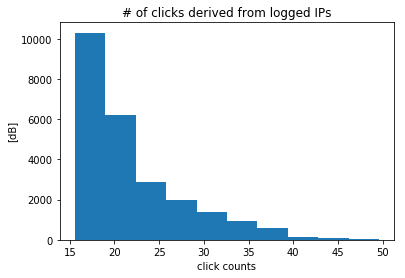

In [7]:
plt.hist(20*np.log10(cli_count[cli_count>N]))
plt.title('# of clicks derived from logged IPs')
plt.xlabel('click counts')
plt.ylabel("[dB]")

In [8]:
# NOT used
col_to_study = ['created_at', 'click_data_created_at','tracking_type_id', 'click_data_android_id','click_data_browser_id', 
               'click_data_city_id', 'click_data_country_id', 'click_data_device_os', 'click_data_device_id', 'click_data_device_os_id',
               'click_data_device_os_version_id', 'click_data_device_type', 'click_data_device_type_id', 
               'click_data_ip_address', 'click_data_os_platform', 'click_data_os_platform_id', 'click_data_sid', 
               'install_event_data_event_time', 'install_event_data_time_to_install', 'install_event_data_user_ip',
               'install_event_data_user_ip_city']


## calculate probability or joint probability for the current column attributes

In [9]:
def extract_pr(arr1d):
    """
    input - one attribute only
    extract proportion ratio for a pandas column
    """
    
    n1 = len(arr1d)
    if np.isnan(arr1d).any():
        r = [not i for i in np.isnan(arr1d)]
        print(r)
        arr1d = arr1d[r] # drop nan
  
    
    if (arr1d<0).any():
        raise TypeError("negative values observed")

    freq = defaultdict(float)
    for val in arr1d:
        freq[val] += 1./float(n1)
    return freq

def extract_pr2(arr1d, arr1d2, arr1d2_keys): 
    """
    input - two attributes, and arr1d depends on arr1d2
    """
    n1 = len(arr1d)
    if np.isnan(arr1d).any():
        r = [not i for i in np.isnan(arr1d)]
        print(r)
        arr1d = arr1d[r] # drop nan
  
  
    if (arr1d<0).any():
        raise TypeError("negative values observed")
    
    freq = defaultdict(float)
    for key in arr1d2_keys:
        dtmp = arr1d[arr1d2==key]
        for val in dtmp:
            freq[repr([key, val])] += 1./float(n1)
    return freq


## Extract attributes probability
### Do the computation of attribute probability distribution for each column

In [10]:
# compute ios_conf column
p_ip = extract_pr(df1['click_data_ip_address'])
p_click = extract_pr(df1['tracking_type_id'])
p_os = extract_pr(df1['click_data_device_os_id'])
p_browser = extract_pr(df1['click_data_browser_id'])
p_os_platform = extract_pr(df1['click_data_os_platform_id']) # this seems repeat from os
p_os_ver = extract_pr2(df1['click_data_device_os_version_id'], df1['click_data_device_os_id'], \
                       np.fromiter(p_os.keys(), dtype=int))
p_asn = extract_pr(df1['click_data_asn_number'])
p_city = extract_pr(df1['click_data_city_id'])
p_app = extract_pr(df1['click_data_app_id'])
p_install_tracking = extract_pr(df1['install_event_data_tracking_id'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Build up new attribute table (only analyse data with (#click > click threshold)
### Encode the attributes with new probability values :
### The original categorical data has no meanings, so the encoding process assign probability meanings to the attributes

In [15]:
# create a new dataframe

# ip_df = pd.DataFrame(data=[], columns=['ip', '#click', 'tSd1', 'tSd2', '#install', 'ios_conf', 'android_conf', 'others_conf'])
df_ip = pd.DataFrame(data=[], columns=['ip', '#click', 'tSd1', 'tSd2', '#install', 
                                       'os', 'os_ver', 'browser', 'asn', 'city', 'app'])
# sub dataset
dev_col = ['created_at', 'click_data_ip_address', 'tracking_type_id', 'click_data_device_os_id', 
           'click_data_device_os_version_id', 'click_data_browser_id', 'click_data_asn_number',
           'click_data_city_id', 'click_data_app_id']
dfsub = df1[dev_col]

c1 = 0
for ip in ip_most[:24000]:
    c1 += 1
    if c1 / 2000 == round(c1/2000):
        print('number of loop is {}'.format(c1))
    # new df row container
    rows_list = np.zeros(df_ip.columns.size)
    
    # organise data
    df_ip1 = dfsub[dfsub['click_data_ip_address'] == ip]
    time1 = df_ip1['created_at'].tolist()
    df_ip1 = df_ip1.drop(['created_at'], 1)
        
    # extract unique rows
    df_tmp = df_ip1.drop_duplicates()
    
    # normalise tracking type id
    df_tmp.loc[df_tmp['tracking_type_id']==4, ('tracking_type_id')] = 2
    df_tmp = df_tmp.drop_duplicates()
    # print('unique rows {}'.format(df_tmp.shape[0]))
    
    rows_list[0] = df_tmp['click_data_ip_address'].tolist()[0]
    rows_list[1] = int(df_ip1.shape[0])
    
    
    if rows_list[1] > 0:
        for it in range(len(time1)):
            time1[it] = datetime.strptime(time1[it], '%Y-%m-%d %H:%M:%S')
        time1 = sorted(time1)
        
        for it in range(len(time1)-1):
            time1[it+1] = (time1[it+1]-time1[0]).total_seconds()
        time1[0] = 0
       
        time1 = np.array(time1[1:])-np.array(time1[:-1])
        
        rows_list[2] = round(np.median(np.abs(time1 - np.median(time1)))*1.4826, 3) # MAD
        rows_list[3] = round(np.std(time1), 3)
        
    # check associated install clicks
    c2 = Counter(df_ip1['tracking_type_id'])
    rows_list[4] = int(c2[10])
    
    # loop over the same IPs and unique rows
    nrow = df_tmp.shape[0]
    
    row2 = np.zeros((nrow, df_ip.columns.size))
    
    for n in range(nrow):
        
        #import pdb; pdb.set_trace()
        row2[n, :5] = rows_list[:5]
                
        if not np.isnan(df_tmp['click_data_device_os_id'].tolist()[n]):
            row2[n, df_ip.columns.tolist().index('os')] = \
            df_tmp['click_data_device_os_id'].tolist()[n]
            # round(p_os[df_tmp['click_data_device_os_id'].tolist()[n]], 4)
        if not np.isnan(df_tmp['click_data_device_os_version_id'].tolist()[n]):
            row2[n, df_ip.columns.tolist().index('os_ver')] = \
            df_tmp['click_data_device_os_version_id'].tolist()[n]
            # round(p_os_ver[repr([df_tmp['click_data_device_os_id'].tolist()[n], df_tmp['click_data_device_os_version_id'].tolist()[n]])], 4)
        if not np.isnan(df_tmp['click_data_browser_id'].tolist()[n]):
            row2[n, df_ip.columns.tolist().index('browser')] = \
            df_tmp['click_data_browser_id'].tolist()[n]
            # round(p_browser[df_tmp['click_data_browser_id'].tolist()[n]], 4)
        if not np.isnan(df_tmp['click_data_asn_number'].tolist()[n]):
            row2[n, df_ip.columns.tolist().index('asn')] = \
            df_tmp['click_data_asn_number'].tolist()[n]
            # round(p_asn[df_tmp['click_data_asn_number'].tolist()[n]], 4)
        if not np.isnan(df_tmp['click_data_city_id'].tolist()[n]):    
            row2[n, df_ip.columns.tolist().index('city')] = \
            df_tmp['click_data_city_id'].tolist()[n]             
            # round(p_city[df_tmp['click_data_city_id'].tolist()[n]], 4)
        if not np.isnan(df_tmp['click_data_app_id'].tolist()[n]):      
            row2[n, df_ip.columns.tolist().index('app')] = \
            df_tmp['click_data_app_id'].tolist()[n]
            # round(p_app[df_tmp['click_data_app_id'].tolist()[n]], 4)
        
        """
        p1 = p_os[df_tmp['click_data_device_os_id'].tolist()[n]]
        p2 = p_os_ver[repr([df_tmp['click_data_device_os_id'].tolist()[n], df_tmp['click_data_device_os_version_id'].tolist()[n]])]
        p3 = p_browser[df_tmp['click_data_browser_id'].tolist()[n]]
        
        # joint probability
        if df_tmp['click_data_device_os_id'].tolist()[n] == 11:
            rows_list[5] = round(p1 * p2 * p3, 5)
        elif df_tmp['click_data_device_os_id'].tolist()[n] == 3:
            rows_list[6] = round(p1 * p2 * p3, 5)
        else:
            rows_list[7] = round(p1 * p2 * p3, 5)    
            
        if n>0:
            row2 = rows_list[:8].copy()
            if df_tmp['click_data_device_os_id'].tolist()[n] == 11:
                row2[5] = round(p1 * p2 * p3, 5)
            elif df_tmp['click_data_device_os_id'].tolist()[n] == 3:
                row2[6] = round(p1 * p2 * p3, 5)
            else:
                row2[7] = round(p1 * p2 * p3, 5)

            rows_list = rows_list+row2 
        """
    
    #rows_list = np.reshape(rows_list, (n+1, 8))
    
    
    rows_df = pd.DataFrame(row2, columns=df_ip.columns)

    df_ip = df_ip.append(rows_df, ignore_index=True)
 


C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 

In [83]:
df_ip2.head()

,ip,#click,tSd1,tSd2,#install,os,os_ver,browser,asn,city,app
0,42.0,43.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,112.673063
1,42.0,43.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,112.673063
2,42.0,43.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,81.707960
3,42.0,43.0,49.667,88.083,0.0,39114.072289,14.264366,4368.297872,20754.111111,2104.2,112.673063
4,42.0,43.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,81.707960


### save dataframe

In [44]:
#df_ip.to_csv("p_test1.csv")
df_ip  = pd.read_csv("p_test1.csv", sep=',');df_ip = df_ip.drop('Unnamed: 0', 1)
#df_ip.head(50)

# Scaling attributes
### scaling using robust_scale or standardize method from sklearn to reduce the sparsity of data

## The existing scaling method is not quite effective for click stream data,
## I think developing a in-house encoding or scaling method would suit the data better
## such as using a log function for maping, and then apply existing scaling function might be a better choise, but need more researh in this aspect

In [14]:
from sklearn import preprocessing

In [37]:
def scale_attr(p_col):
    out = p_col.copy()
    
    dict_values = list(out.values())
    dict_values = np.reshape(dict_values, (len(dict_values), 1))
    
    dict_values = preprocessing.robust_scale(dict_values)
    #scaler = preprocessing.MinMaxScaler()
    #scaler.fit(dict_values)
    
    key_list = [k for k in p_col.keys()]

    c=0
    for v in p_col.keys():
        c+=1
        if c/100000 == c//100000.:
            print(c)
        out[v] = dict_values[key_list.index(v)][0]
        #print(out[v])
    return out

In [38]:
scale_os = scale_attr(p_os)
scale_browser = scale_attr(p_browser)
scale_asn = scale_attr(p_asn)
scale_city = scale_attr(p_city)
scale_app = scale_attr(p_app)
scale_ip = scale_attr(p_ip)
scale_os_ver = scale_attr(p_os_ver)   

100000
200000
300000


In [46]:
nrow = len(df_ip)
df_ip2 = df_ip.copy()
for ii in range(nrow):
    df_ip2['ip'][ii] = scale_ip[df_ip['ip'][ii]]
    df_ip2['os'][ii] = scale_os[df_ip['os'][ii]]
    ver_str = repr([df_ip['os'][ii].astype(np.int64), df_ip['os_ver'][ii]])
    df_ip2['os_ver'][ii] = scale_os_ver[ver_str]
    df_ip2['browser'][ii] = scale_browser[df_ip['browser'][ii]]
    df_ip2['asn'][ii] = scale_asn[df_ip['asn'][ii]]
    df_ip2['city'][ii] = scale_city[df_ip['city'][ii]]
    df_ip2['app'][ii] = scale_app[df_ip['app'][ii]]

## ip and clicks are connected linearly after encoding, basically using clicks to standardise ip, thus a linear relationship is gained.
### This operation reduces the two dimensions (ip and clicks) into one, as shown the linear mapping between ip and clicks

Text(0.5,1,'after ip scaling')

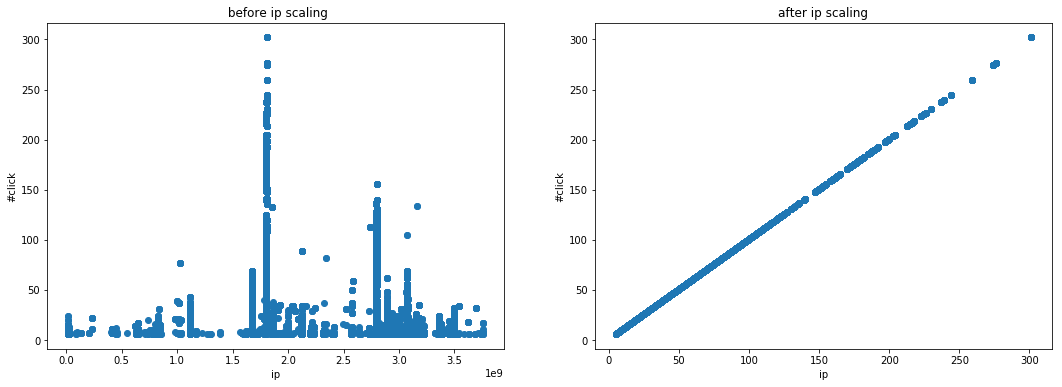

In [48]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.scatter(df_ip['ip'], df_ip['#click'])
plt.xlabel('ip');plt.ylabel('#click')
plt.title(' before ip scaling')
plt.subplot(122)
plt.scatter(df_ip2['ip'], df_ip2['#click'])
plt.xlabel('ip');plt.ylabel('#click')
plt.title('after ip scaling')

## more consistent / uniform data, after encoding and scaling with probability

'\nthere are relationships after scaling, at lower encoded ip/click numbers, the continurousity may means the strong\nrandomness to os or os_ver, but at high clicks, the randomness is reduced.\n'

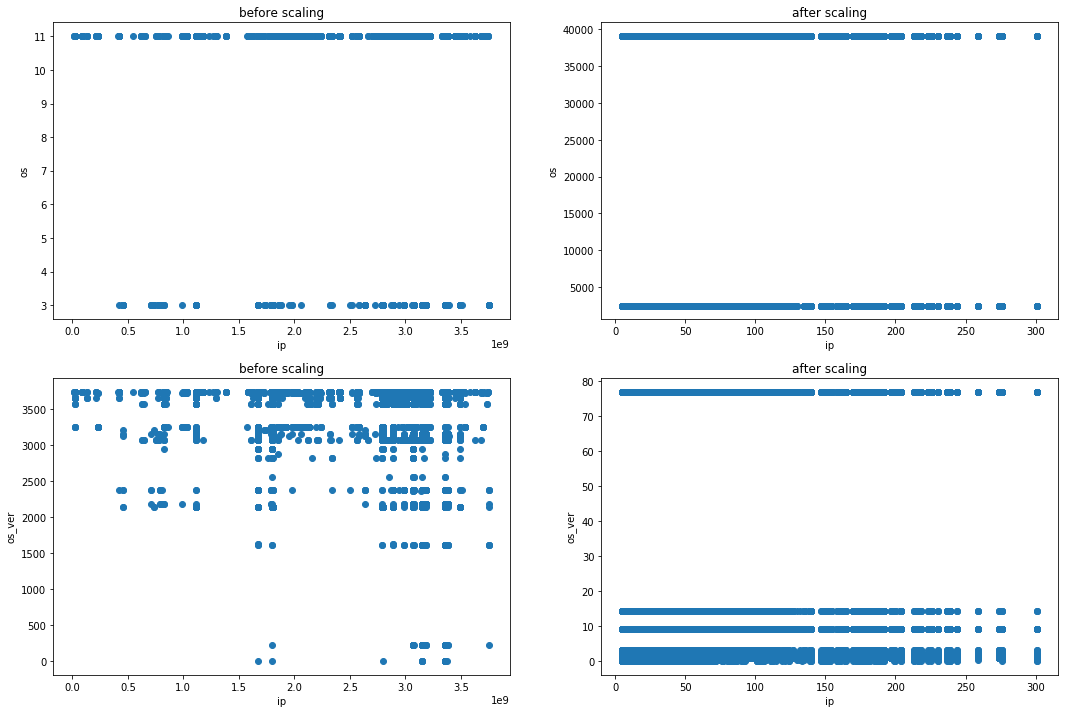

In [49]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.scatter(df_ip['ip'], df_ip['os'])
plt.xlabel('ip');plt.ylabel('os')
plt.title('before scaling')
plt.subplot(222)
plt.scatter(df_ip2['ip'], df_ip2['os'])
plt.xlabel('ip');plt.ylabel('os')
plt.title('after scaling')

plt.subplot(223)
plt.scatter(df_ip['ip'], df_ip['os_ver'])
plt.xlabel('ip');plt.ylabel('os_ver')
plt.title('before scaling')
plt.subplot(224)
plt.scatter(df_ip2['ip'], df_ip2['os_ver'])
plt.xlabel('ip');plt.ylabel('os_ver')
plt.title('after scaling')

"""
there are relationships after scaling, at lower encoded ip/click numbers, the continurousity may means the strong
randomness to os or os_ver, but at high clicks, the randomness is reduced.
"""

### tSd (standard deviation) not scaled, so it shows the similar figure when plot (click, tSd)

Text(0.5,1,'after scaling')

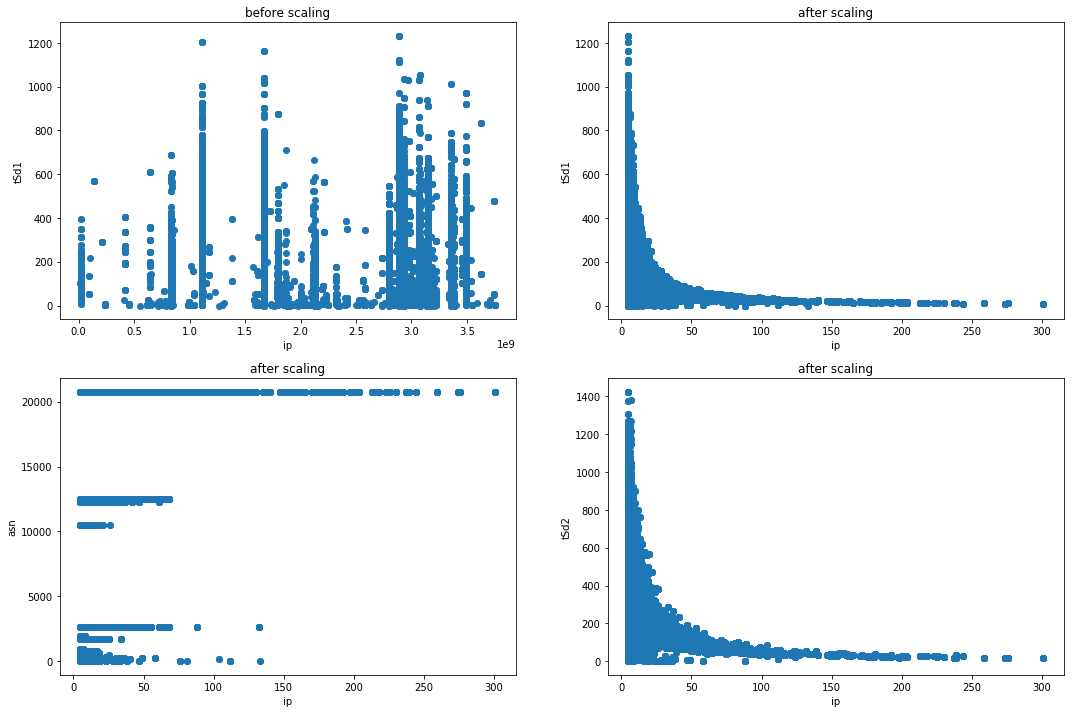

In [213]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.scatter(df_ip['ip'], df_ip['tSd1'])
plt.xlabel('ip');plt.ylabel('tSd1')
plt.title('before scaling')
plt.subplot(222)
plt.scatter(df_ip2['ip'], df_ip2['tSd1'])
plt.xlabel('ip');plt.ylabel('tSd1')
plt.title('after scaling')

plt.subplot(223)
plt.scatter(df_ip2['ip'], df_ip2['asn'])
plt.xlabel('ip');plt.ylabel('asn')
plt.title('after scaling')
plt.subplot(224)
plt.scatter(df_ip2['ip'], df_ip2['tSd2'])
plt.xlabel('ip');plt.ylabel('tSd2')
plt.title('after scaling')

In [138]:
d1 = df_ip2.groupby(['city'], as_index=False).aggregate(np.sum)
d1 = d1.loc[d1['city'] > 250]

In [139]:
from pyecharts import Bar
br = Bar('clicks -> city')
br.add('clicks <- city id', d1['city'], d1['#click'])
br.add('#install*10,000 <- city id', d1['city'], d1['#install']*10000)
br.add('tSd1 <- city id', d1['city'], d1['tSd1']*0.2)

Text(0.5,1,'after scaling')

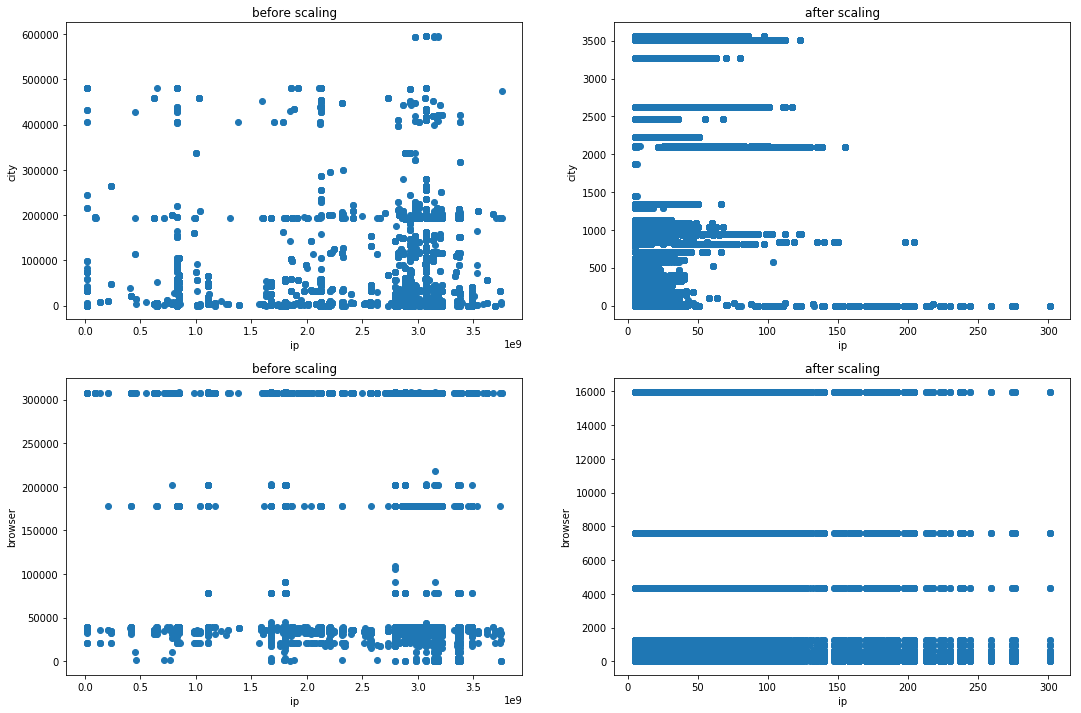

In [203]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.scatter(df_ip['ip'], df_ip['city'])
plt.xlabel('ip');plt.ylabel('city')
plt.title('before scaling')
plt.subplot(222)
# this plot is not good, consider changing the way of showing data
plt.scatter(df_ip2['ip'], df_ip2['city'])
plt.xlabel('ip');plt.ylabel('city')
plt.title('after scaling')

plt.subplot(223)
plt.scatter(df_ip['ip'], df_ip['browser'])
plt.xlabel('ip');plt.ylabel('browser')
plt.title('before scaling')
plt.subplot(224)
plt.scatter(df_ip2['ip'], df_ip2['browser'])
plt.xlabel('ip');plt.ylabel('browser')
plt.title('after scaling')

Text(0.5,1,'before [browser]')

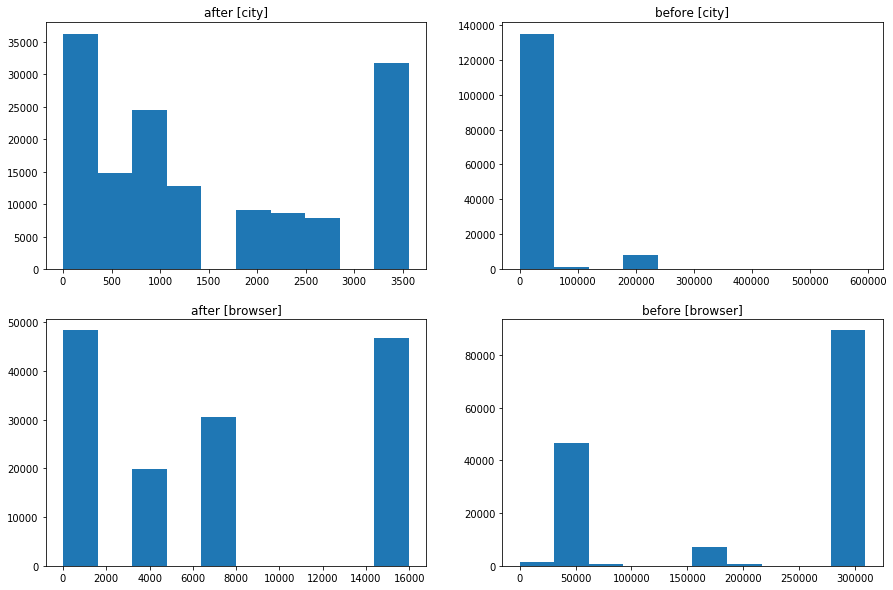

In [219]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.hist(df_ip2['city'])
plt.title('after [city]')
plt.subplot(222)
plt.hist(df_ip['city'])
plt.title('before [city]')

plt.subplot(223)
plt.hist(df_ip2['browser'])
plt.title('after [browser]')
plt.subplot(224)
plt.hist(df_ip['browser'])
plt.title('before [browser]')

### The scaling results need more analysis, and an extra mapping or other modeling functions may be required to better organise the data

### group by IP, and keep max values

In [147]:
len(p_city)

12440

## check dataframe again

In [56]:
from sklearn import manifold
from sklearn.manifold import TSNE

In [64]:
df_ip2
df_ip3 = df_ip2.drop(['#click'], 1)
df_ip3.head()

,ip,tSd1,tSd2,#install,os,os_ver,browser,asn,city,app
0,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,112.673063
1,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,112.673063
2,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,81.707960
3,42.0,49.667,88.083,0.0,39114.072289,14.264366,4368.297872,20754.111111,2104.2,112.673063
4,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,81.707960


In [72]:
df_ip3 = df_ip2.drop(['#click'], 1)
scaler = preprocessing.MinMaxScaler()
scaler.fit(df_ip3)
df_ip3 = scaler.transform(df_ip3)

## Try TSNE method
#### however, this doesnot make sense to me, as shown in the plot, 
#### the data input is not quite relevant to using this method

In [74]:
X = TSNE(n_components=2, verbose=True).fit_transform(df_ip3)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 145491 samples in 2.639s...
[t-SNE] Computed neighbors for 145491 samples in 31.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 145491
[t-SNE] Computed conditional probabilities for sample 2000 / 145491
[t-SNE] Computed conditional probabilities for sample 3000 / 145491
[t-SNE] Computed conditional probabilities for sample 4000 / 145491
[t-SNE] Computed conditional probabilities for sample 5000 / 145491
[t-SNE] Computed conditional probabilities for sample 6000 / 145491
[t-SNE] Computed conditional probabilities for sample 7000 / 145491
[t-SNE] Computed conditional probabilities for sample 8000 / 145491
[t-SNE] Computed conditional probabilities for sample 9000 / 145491
[t-SNE] Computed conditional probabilities for sample 10000 / 145491
[t-SNE] Computed conditional probabilities for sample 11000 / 145491
[t-SNE] Computed conditional probabilities for sample 12000 / 145491
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 126000 / 145491
[t-SNE] Computed conditional probabilities for sample 127000 / 145491
[t-SNE] Computed conditional probabilities for sample 128000 / 145491
[t-SNE] Computed conditional probabilities for sample 129000 / 145491
[t-SNE] Computed conditional probabilities for sample 130000 / 145491
[t-SNE] Computed conditional probabilities for sample 131000 / 145491
[t-SNE] Computed conditional probabilities for sample 132000 / 145491
[t-SNE] Computed conditional probabilities for sample 133000 / 145491
[t-SNE] Computed conditional probabilities for sample 134000 / 145491
[t-SNE] Computed conditional probabilities for sample 135000 / 145491
[t-SNE] Computed conditional probabilities for sample 136000 / 145491
[t-SNE] Computed conditional probabilities for sample 137000 / 145491
[t-SNE] Computed conditional probabilities for sample 138000 / 145491
[t-SNE] Computed conditional probabilities for sample 139000 / 145491
[t-SNE] Computed con

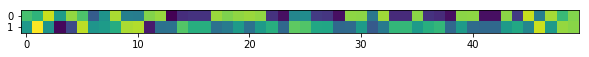

In [146]:
plt.figure(figsize=(10, 5))
plt.imshow(X[:50].T)


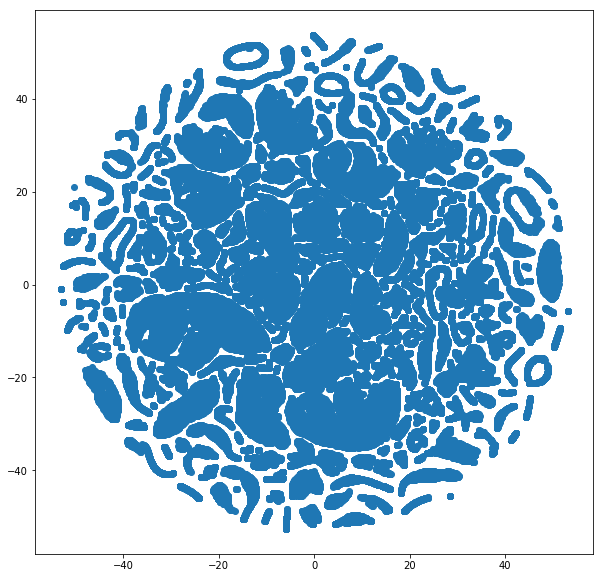

In [76]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1])

### need a further look into the the tsne results ,and check the two dimension data output, see if we can reduce the original data to two dimensions.

C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0,0.5,'time std2')

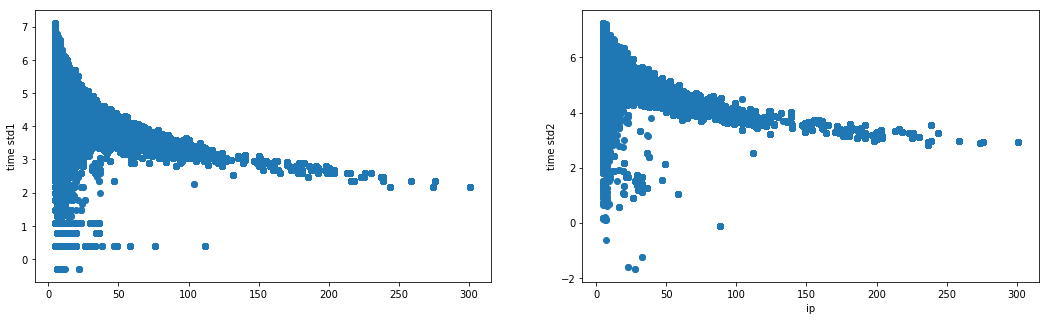

In [235]:
logt = np.log(df_ip3['tSd1'])
plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.scatter(df_ip3['ip'], logt)
plt.ylabel('time std1')
plt.subplot(122)
plt.scatter(df_ip3['ip'], np.log(df_ip3['tSd2']))
plt.xlabel('ip')
plt.ylabel('time std2')

Text(0,0.5,'ip')

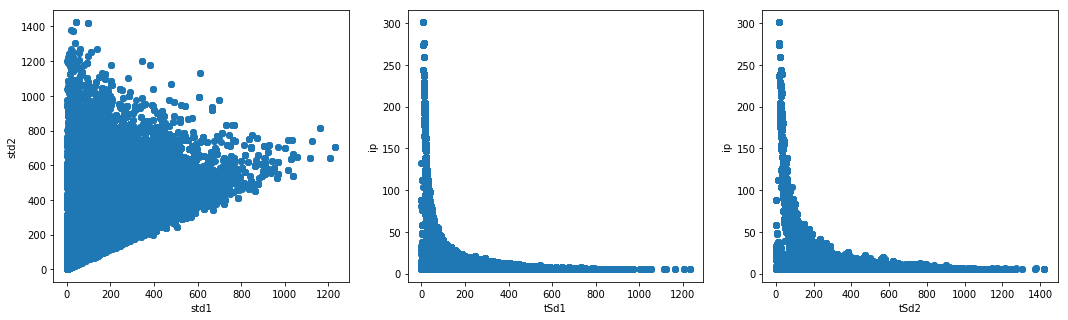

In [236]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.scatter(df_ip3['tSd1'], df_ip3['tSd2'])
plt.xlabel('std1')
plt.ylabel('std2')
plt.subplot(132)
plt.scatter(df_ip3['tSd1'], df_ip3['ip'])
plt.xlabel('tSd1')
plt.ylabel('ip')
plt.subplot(133)
plt.scatter(df_ip3['tSd2'], df_ip3['ip'])
plt.xlabel('tSd2')
plt.ylabel('ip')

Text(0,0.5,'ip')

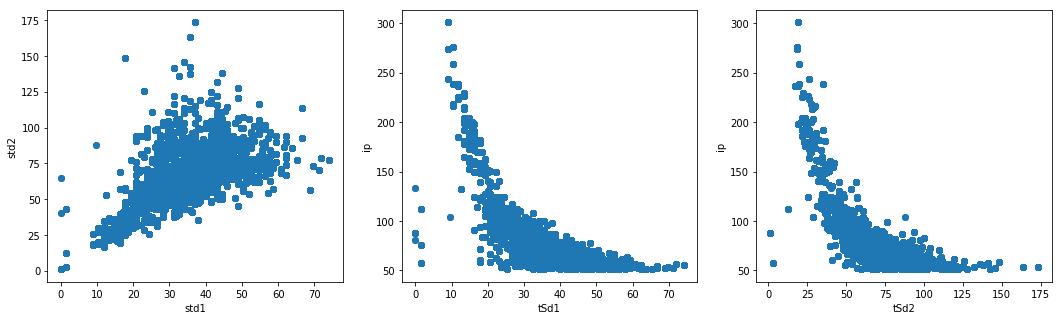

In [238]:
ip_df_g1 = df_ip3.loc[df_ip3['ip']>50, :]
#%matplotlib tk

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.scatter(ip_df_g1['tSd1'], ip_df_g1['tSd2'])

plt.xlabel('std1')
plt.ylabel('std2')
plt.subplot(132)
plt.scatter(ip_df_g1['tSd1'], ip_df_g1['ip'])

plt.xlabel('tSd1')
plt.ylabel('ip')
plt.subplot(133)
#plt.scatter(np.array(ip_df_g1['tSd2'])/np.array(ip_df_g1['#click']), ip_df_g1['#click'])
plt.scatter(ip_df_g1['tSd2'], ip_df_g1['ip'])

plt.xlabel('tSd2')
plt.ylabel('ip')

In [240]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0.92,'sd1, sd2 to clicks/ip')

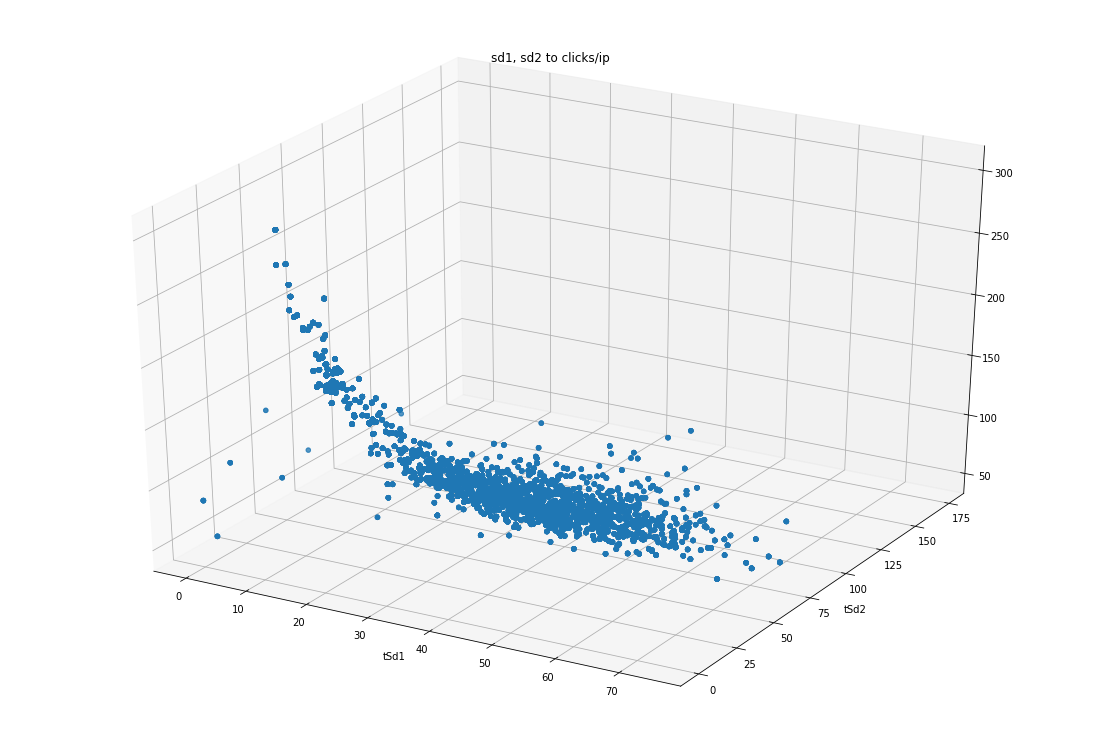

In [241]:
#ip_df_g1 = ip_df_g.loc[ip_df_g['#click']>30, :]

fig = plt.figure(figsize=(15, 10))

ax = Axes3D(fig)

xs = ip_df_g1['tSd1'] 
ys = ip_df_g1['tSd2'] 
zs = ip_df_g1['ip']
ax.scatter(xs, ys, zs)
plt.xlabel('tSd1')
plt.ylabel('tSd2')
plt.title('sd1, sd2 to clicks/ip')


Text(0.5,1,'tSd2')

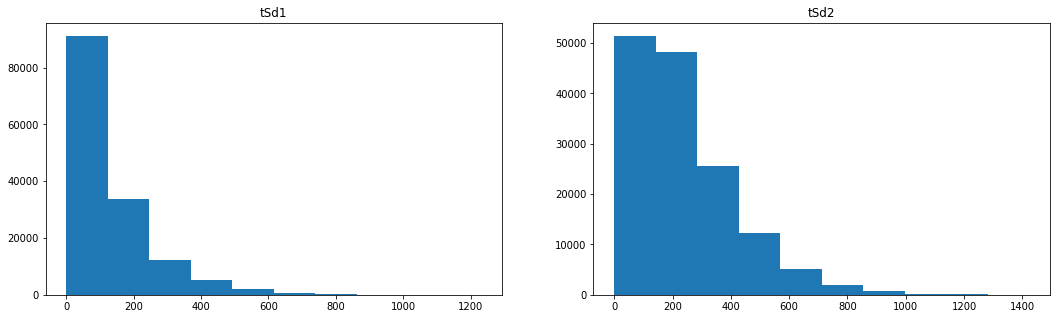

In [242]:
plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.hist(df_ip3['tSd1'])
plt.title('tSd1')
plt.subplot(122)
plt.hist(df_ip3['tSd2'])
plt.title('tSd2')

In [248]:
from ggplot import *

In [300]:
df_ip3.head()


,ip,tSd1,tSd2,#install,os,os_ver,browser,asn,city,app
0,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,112.673063
1,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,112.673063
2,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,81.707960
3,42.0,49.667,88.083,0.0,39114.072289,14.264366,4368.297872,20754.111111,2104.2,112.673063
4,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,81.707960


In [350]:
os1 = df_ip3.groupby(['os', 'os_ver'])['os'].count()

In [355]:
os1.index.labels

FrozenList([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 3, 5, 8, 11, 12, 13, 16, 18, 21, 22, 25, 2, 3, 4, 6, 7, 9, 10, 14, 15, 17, 19, 20, 23, 24, 26, 27, 28, 29]])

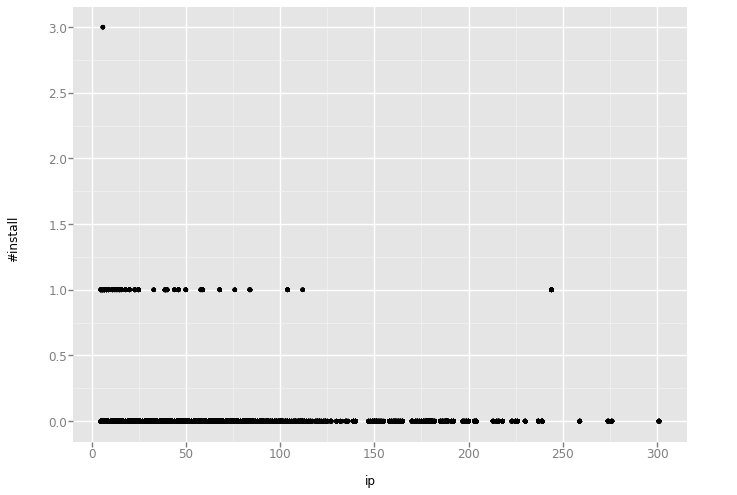

<ggplot: (148977094590)>

In [253]:
ggplot(df_ip3, aes(x='ip', y='#install')) + geom_point(alpha=0.9)

In [254]:
df_ip3.head()

,ip,tSd1,tSd2,#install,os,os_ver,browser,asn,city,app
0,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,112.673063
1,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,112.673063
2,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,81.707960
3,42.0,49.667,88.083,0.0,39114.072289,14.264366,4368.297872,20754.111111,2104.2,112.673063
4,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,81.707960


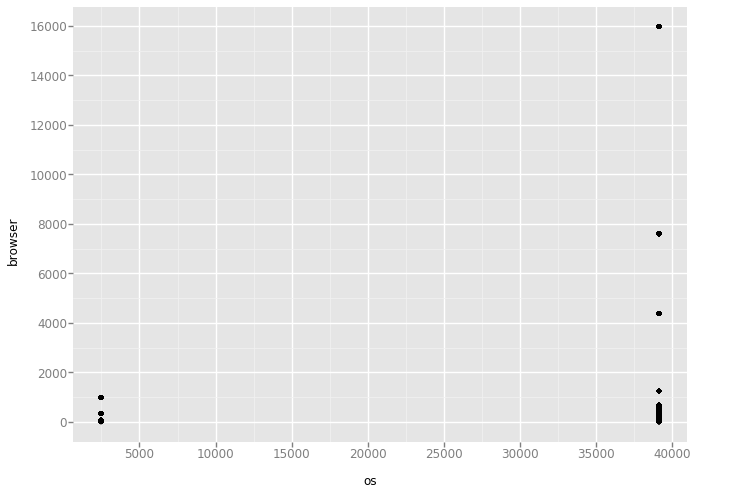

<ggplot: (-9223371887905817933)>

In [257]:
ggplot(df_ip3, aes(x='os', y='browser')) + geom_point(alpha=0.9)

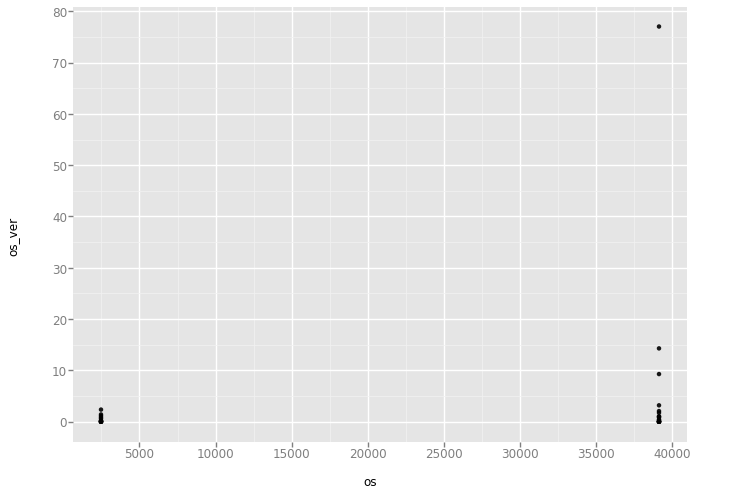

<ggplot: (148962401330)>

In [335]:
ggplot(df_ip3, aes(x='os', y='os_ver')) + geom_point(alpha=0.9)

# Checking relatinship between ip/click and tSd (standard deviation)

In [263]:
x = df_ip3[['tSd1', 'tSd2']].values
y = df_ip3['ip'].values

In [264]:
df_ip3.to_csv("df_ip3.csv")

In [265]:
#y1 = preprocessing.minmax_scale(y)
y1 = 0.5*np.exp(-y/80)

y1

array([0.29577768, 0.29577768, 0.29577768, ..., 0.45810944, 0.45810944,
       0.45810944])

[-0.04579592 -0.10838705]
4.916674807067958


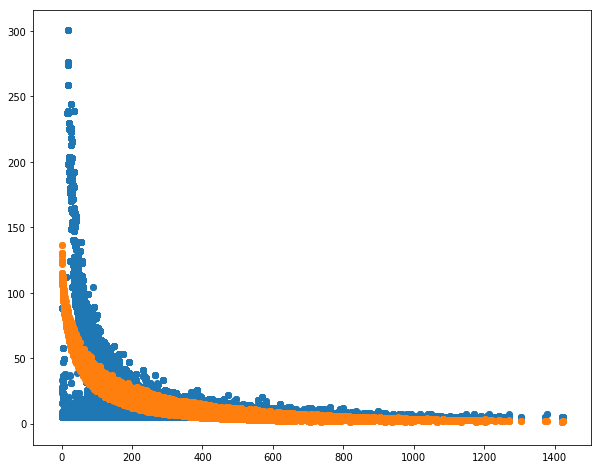

In [363]:
%matplotlib inline
from sklearn import linear_model
reg = linear_model.LinearRegression()
#reg = linear_model.Ridge(alpha = 0.1)
ct = 1. # not necessary
reg.fit((np.sqrt(x/ct)), (np.log(y/ct)))
print(reg.coef_)
print(reg.intercept_)
yp = reg.predict((np.sqrt(x/ct)))
plt.figure(figsize=(10, 8))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],(ct*np.exp(yp)))

Text(0.5,0.92,'sd1, sd2 to clicks')

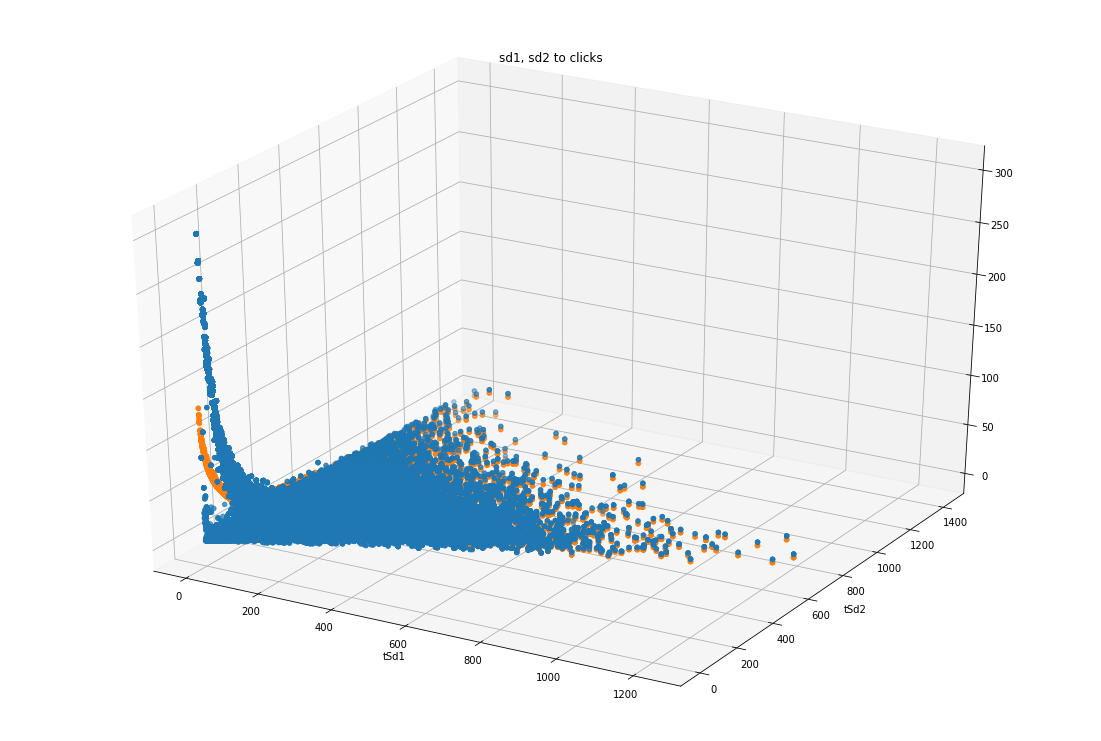

In [287]:
#%matplotlib tk
fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig)
#ax.view_init(30, 60)
xs = x[:,0]
ys = x[:,1]
zs = ct*np.exp(yp)
zs1 = df_ip3['ip']
ax.scatter(xs, ys, zs1)
ax.scatter(xs, ys, zs)
plt.xlabel('tSd1')
plt.ylabel('tSd2')
plt.title('sd1, sd2 to clicks')

# TEST simple clustering algorithms, kmean, agglomerative
## the clustering algorithm from scikit-learn

In [428]:
df_ip3.head(2)

,ip,tSd1,tSd2,#install,os,os_ver,browser,asn,city,app
0,42.0,49.667,88.083,0.0,39114.072289,77.035194,7595.361702,20754.111111,2104.2,112.673063
1,42.0,49.667,88.083,0.0,39114.072289,77.035194,15978.170213,20754.111111,2104.2,112.673063


In [397]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import time

In [481]:
# pick attributes for ML testing
X = df_ip3.iloc[:, [0, 1, 4, 5, 6, 8]]

In [480]:
# scale
x_scaler = preprocessing.MinMaxScaler()
X = x_scaler.fit_transform(X.values)

In [483]:
X2 = X.values[:5000,:]
X2.shape

(5000, 6)

In [484]:
knn_graph = kneighbors_graph(X2, 10, mode='connectivity', include_self=False)

C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 72 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 72 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 72 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 72 > 1. Completing it to avoid sto

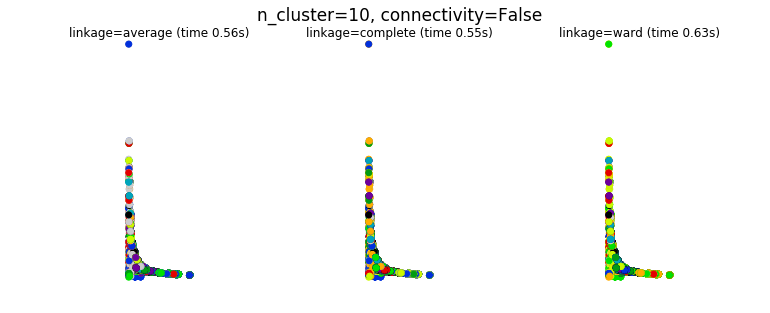

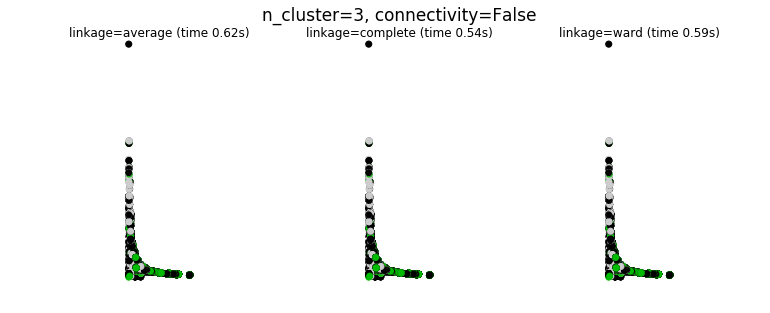

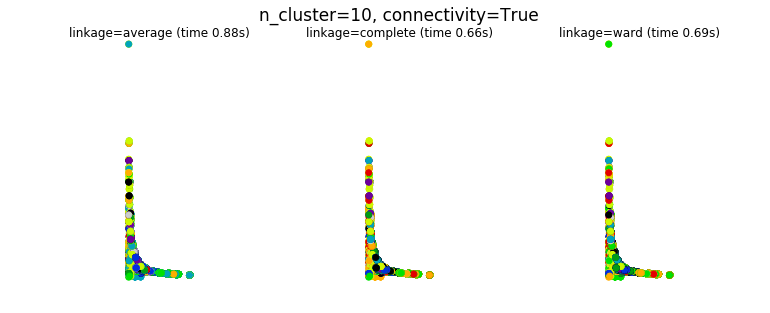

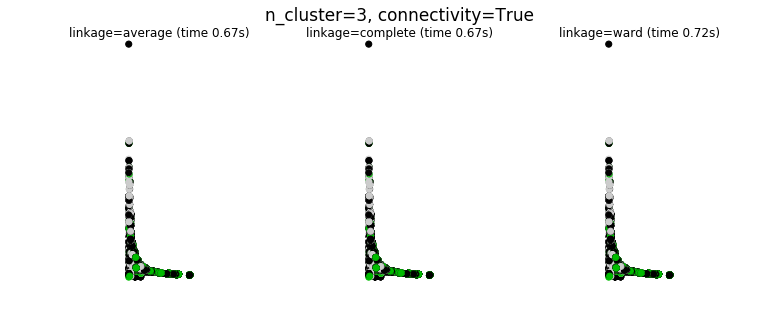

In [485]:
for connectivity in (None, knn_graph):
    for n_clusters in (10, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X2)
            elapsed_time = time.time() - t0
            plt.scatter(X2[:, 0], X2[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

In [420]:
from sklearn.cluster import KMeans

In [435]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(X2)

[[1.49043974e-01 7.45328657e-02 1.00000000e+00 1.00000000e+00
  7.73815815e-01 4.93903624e-01]
 [2.80978750e-01 5.74663655e-02 1.00000000e+00 1.16763490e-01
  1.03888999e-01 1.20026518e-01]
 [3.41607476e-01 3.84682661e-02 1.15463195e-14 2.26078852e-02
  3.26670137e-02 4.07326892e-01]
 [1.78263790e-01 4.83769564e-02 1.00000000e+00 1.18301682e-01
  1.17088854e-01 8.06266066e-01]]


In [443]:
np.unique(y_km)

array([0, 1, 2, 3])

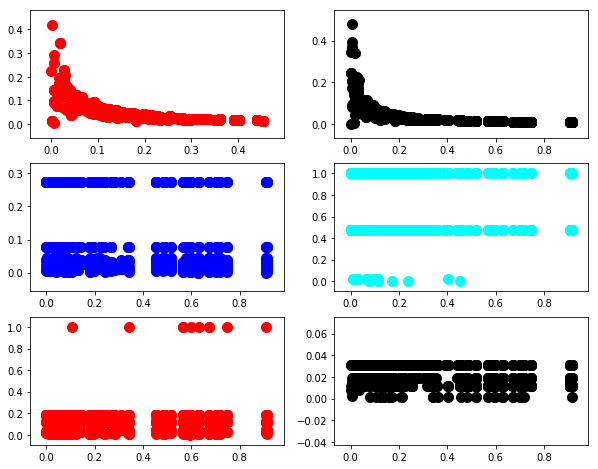

In [446]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
plt.scatter(X2[y_km ==3,0], X2[y_km == 3,1], s=100, c='red')
plt.subplot(3, 2, 2)
plt.scatter(X2[y_km ==2,0], X2[y_km == 2,1], s=100, c='black')
plt.subplot(3, 2, 3)
plt.scatter(X2[y_km ==0,0], X2[y_km == 0,4], s=100, c='blue')
plt.subplot(3, 2, 4)
plt.scatter(X2[y_km ==1,0], X2[y_km == 1,4], s=100, c='cyan')
plt.subplot(3, 2, 5)
plt.scatter(X2[y_km ==0,0], X2[y_km == 0,3], s=100, c='red')
plt.subplot(3, 2, 6)
plt.scatter(X2[y_km ==2,0], X2[y_km == 2,3], s=100, c='black')

In [451]:
points = df_ip3.iloc[:, [0, 2]]
points = points.values
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
print(kmeans.cluster_centers_)
y_km1 = kmeans.fit_predict(points)

[[ 14.40420519 233.97043504]
 [  6.25589385 704.31456842]
 [  8.30708408 421.97023871]
 [ 53.98624172  93.7973458 ]]


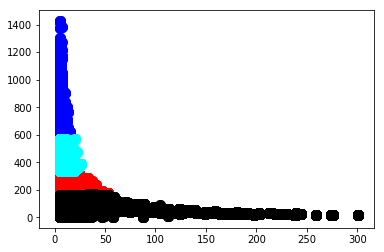

In [452]:
plt.scatter(points[y_km1 ==0,0], points[y_km1 == 0,1], s=100, c='red')
plt.scatter(points[y_km1 ==1,0], points[y_km1 == 1,1], s=100, c='black')
plt.scatter(points[y_km1 ==2,0], points[y_km1 == 2,1], s=100, c='blue')
plt.scatter(points[y_km1 ==3,0], points[y_km1 == 3,1], s=100, c='cyan')

# 1. improve the current functions, assign attribute with more meaningful values
# 2. build / analyse functions for device, location etc., for further dimension reduction
##   reduce dimensions on dependant attributes, such as build joint scores based on mulitple derived attributes
# 4. test different ML algorithms